## We Prepare The Raw Dataset First

In [4]:
import pandas as pd

df = pd.read_csv('updated_merged_dataset2_with_calls.csv') #we load up the dataset 
df.head(10) 

,user_id,plan,session_date,mb_used,total_messages_used,total_minutes
0,1000,ultimate,2018-12-26,270.99,1.0,14.36
1,1000,ultimate,2018-12-27,880.22,3.0,48.26
2,1000,ultimate,2018-12-28,660.40,1.0,29.00
3,1000,ultimate,2018-12-29,89.86,1.0,1.70
4,1000,ultimate,2018-12-31,0.00,3.0,19.29
5,1001,surf,2018-08-15,210.82,4.0,0.00
6,1001,surf,2018-08-16,82.78,2.0,23.46
7,1001,surf,2018-08-16,534.19,2.0,23.46
8,1001,surf,2018-08-17,173.39,2.0,8.11
9,1001,surf,2018-08-17,374.29,2.0,8.11


## We want to predict the amount of data used so we drop the other columns

In [5]:
df2 = df.drop(columns=['plan','total_messages_used', 'total_minutes'])
df2.head()

/Users/lordskyzw/Desktop/ZNA/app/zna/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,user_id,session_date,mb_used
0,1000,2018-12-26,270.99
1,1000,2018-12-27,880.22
2,1000,2018-12-28,660.40
3,1000,2018-12-29,89.86
4,1000,2018-12-31,0.00


## We pick a specific user id since the model cannot discern between users

```python

In [6]:
specific_user_id = 1002 
filtered_df = df2[df2['user_id'] == specific_user_id]
filtered_df

,user_id,session_date,mb_used
250,1002,2018-10-22,686.01
251,1002,2018-10-22,939.47
252,1002,2018-10-22,295.50
253,1002,2018-10-23,0.00
254,1002,2018-10-23,668.82
...,...,...,...
369,1002,2018-12-27,0.00
370,1002,2018-12-29,0.00
371,1002,2018-12-29,849.56
372,1002,2018-12-30,743.31


## we drop the user_id column since the model only takes in a time series data

In [7]:
user_id10002 = filtered_df.drop(columns='user_id')
user_id10002

,session_date,mb_used
250,2018-10-22,686.01
251,2018-10-22,939.47
252,2018-10-22,295.50
253,2018-10-23,0.00
254,2018-10-23,668.82
...,...,...
369,2018-12-27,0.00
370,2018-12-29,0.00
371,2018-12-29,849.56
372,2018-12-30,743.31


## now that we have the time series data, the model requires we rename the columns to 'ds' and 'y' for timestamp and target respectively

In [28]:
user_id1k2 = user_id10002.rename(columns={'session_date': 'ds', 'mb_used': 'y'})

df_aggregated = user_id1k2.groupby('ds').sum().reset_index()

last_date = df_aggregated['ds'].max()
last_date

'2018-12-31'

## here we import the model and train it

In [16]:
from prophet import Prophet 


model = Prophet()
model.fit(df_aggregated)
future = model.make_future_dataframe(periods=30)
future.tail()

18:48:27 - cmdstanpy - INFO - Chain [1] start processing
18:48:27 - cmdstanpy - INFO - Chain [1] done processing


,ds
83,2019-01-26
84,2019-01-27
85,2019-01-28
86,2019-01-29
87,2019-01-30


In [30]:
forecast = model.predict(future)
forecast_from_last_date = forecast[forecast['ds'] >= last_date]
real_forecast = forecast_from_last_date[['ds', 'yhat']]

In [32]:
real_forecast

,ds,yhat
57,2018-12-31,529.547221
58,2019-01-01,1057.244981
59,2019-01-02,638.728562
60,2019-01-03,666.379171
61,2019-01-04,857.042679
62,2019-01-05,463.969471
63,2019-01-06,670.516443
64,2019-01-07,529.087509
65,2019-01-08,1056.785270
66,2019-01-09,638.268850


In [21]:
type(fig1)

matplotlib.figure.Figure

## here we visualize the predictions

/Users/lordskyzw/Desktop/ZNA/app/zna/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


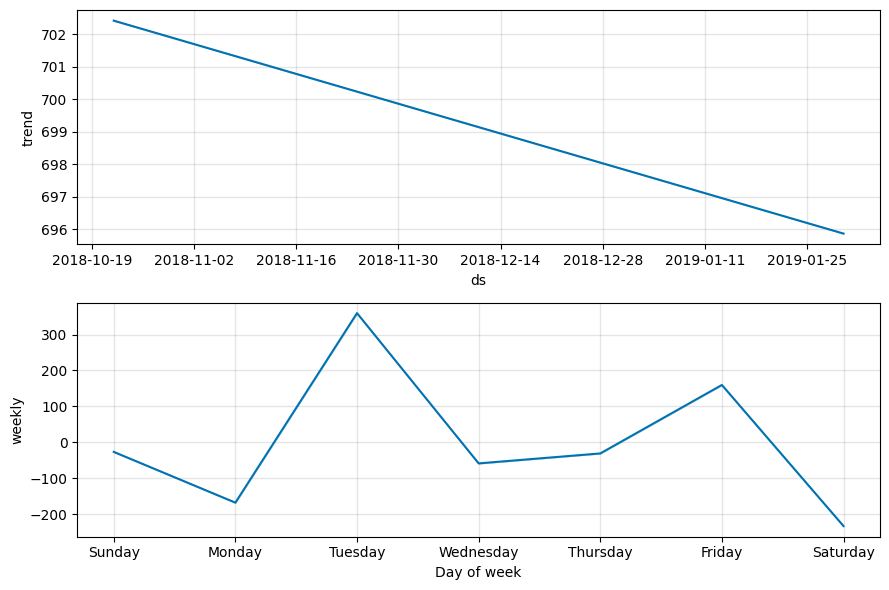

In [19]:
fig2 = m.plot_components(forecast)

In [20]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 10, 22, 0, 0),
                          datetime.datetime(2018, 10, 23, 0, 0),
                          datetime.datetime(2018, 10, 24, 0, 0),
                          datetime.datetime(2018, 10, 25, 0, 0),
                          datetime.datetime(2018, 10, 26, 0, 0),
                          datetime.datetime(2018, 10, 27, 0, 0),
                          datetime.datetime(2018, 10, 28, 0, 0),
                          datetime.datetime(2018, 10, 29, 0, 0),
                          datetime.datetime(2018, 10, 30, 0, 0),
                          datetime.datetime(2018, 10, 31, 0, 0),
                          datetime.datetime(2018, 11, 3, 0, 0),
                          datetime.datetime(2018, 11, 4, 0, 0),
                          datetime.datetime(2018, 11, 5, 0, 0),
                          datetime.datetime(2018, 11, 6, 0, 0),
                          datetime.datetime(2018, 11, 7, 0, 0),
                          datetime.datetime(2018, 11, 8, 0, 0),
                          datetime.datetime(2018, 11, 9, 0, 0),
                          datetime.datetime(2018, 11, 10, 0, 0),
                          datetime.datetime(2018, 11, 12, 0, 0),
                          datetime.datetime(2018, 11, 13, 0, 0),
                          datetime.datetime(2018, 11, 15, 0, 0),
                          datetime.datetime(2018, 11, 16, 0, 0),
                          datetime.datetime(2018, 11, 17, 0, 0),
                          datetime.datetime(2018, 11, 18, 0, 0),
                          datetime.datetime(2018, 11, 19, 0, 0),
                          datetime.datetime(2018, 11, 20, 0, 0),
                          datetime.datetime(2018, 11, 21, 0, 0),
                          datetime.datetime(2018, 11, 22, 0, 0),
                          datetime.datetime(2018, 11, 23, 0, 0),
                          datetime.datetime(2018, 11, 25, 0, 0),
                          datetime.datetime(2018, 11, 27, 0, 0),
                          datetime.datetime(2018, 11, 28, 0, 0),
                          datetime.datetime(2018, 11, 29, 0, 0),
                          datetime.datetime(2018, 11, 30, 0, 0),
                          datetime.datetime(2018, 12, 2, 0, 0),
                          datetime.datetime(2018, 12, 3, 0, 0),
                          datetime.datetime(2018, 12, 4, 0, 0),
                          datetime.datetime(2018, 12, 5, 0, 0),
                          datetime.datetime(2018, 12, 6, 0, 0),
                          datetime.datetime(2018, 12, 7, 0, 0),
                          datetime.datetime(2018, 12, 8, 0, 0),
                          datetime.datetime(2018, 12, 9, 0, 0),
                          datetime.datetime(2018, 12, 10, 0, 0),
                          datetime.datetime(2018, 12, 13, 0, 0),
                          datetime.datetime(2018, 12, 14, 0, 0),
                          datetime.datetime(2018, 12, 15, 0, 0),
                          datetime.datetime(2018, 12, 16, 0, 0),
                          datetime.datetime(2018, 12, 17, 0, 0),
                          datetime.datetime(2018, 12, 18, 0, 0),
                          datetime.datetime(2018, 12, 19, 0, 0),
                          datetime.datetime(2018, 12, 20, 0, 0),
                          datetime.datetime(2018, 12, 23, 0, 0),
                          datetime.datetime(2018, 12, 24, 0, 0),
                          datetime.datetime(2018, 12, 26, 0, 0),
                          datetime.datetime(2018, 12, 27, 0, 0),
                          datetime.datetime(2018, 12, 29, 0, 0),
                          datetime.datetime(2018, 12, 30, 0, 0),
                          datetime.datetime(2018, 12, 31, 0, 0)], dtype=object),
              'y': array([1920.98,  668.82,  847.04, 1170.35,  674.

In [11]:

plot_components_plotly(m, forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'trend',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 8, 15, 0, 0),
                          datetime.datetime(2018, 8, 16, 0, 0),
                          datetime.datetime(2018, 8, 17, 0, 0),
                          datetime.datetime(2018, 8, 18, 0, 0),
                          datetime.datetime(2018, 8, 19, 0, 0),
                          datetime.datetime(2018, 8, 20, 0, 0),
                          datetime.datetime(2018, 8, 21, 0, 0),
                          datetime.datetime(2018, 8, 22, 0, 0),
                          datetime.datetime(2018, 8, 23, 0, 0),
                          datetime.datetime(2018, 8, 24, 0, 0),
                          datetime.datetime(2018, 8, 25, 0, 0),
                          datetime.datetime(2018, 8, 27, 0, 0),
                          datetime.datetime(2018, 8, 28, 0, 0),
                          datetime.datetime(2018, 8, 29, 0, 0),
                          datetime.datetime(2018, 8, 30, 0, 0),
                          datetime.datetime(2018, 8, 31, 0, 0),
                          datetime.datetime(2018, 9, 1, 0, 0),
                          datetime.datetime(2018, 9, 2, 0, 0),
                          datetime.datetime(2018, 9, 4, 0, 0),
                          datetime.datetime(2018, 9, 5, 0, 0),
                          datetime.datetime(2018, 9, 6, 0, 0),
                          datetime.datetime(2018, 9, 7, 0, 0),
                          datetime.datetime(2018, 9, 8, 0, 0),
                          datetime.datetime(2018, 9, 9, 0, 0),
                          datetime.datetime(2018, 9, 11, 0, 0),
                          datetime.datetime(2018, 9, 12, 0, 0),
                          datetime.datetime(2018, 9, 13, 0, 0),
                          datetime.datetime(2018, 9, 16, 0, 0),
                          datetime.datetime(2018, 9, 17, 0, 0),
                          datetime.datetime(2018, 9, 18, 0, 0),
                          datetime.datetime(2018, 9, 19, 0, 0),
                          datetime.datetime(2018, 9, 20, 0, 0),
                          datetime.datetime(2018, 9, 21, 0, 0),
                          datetime.datetime(2018, 9, 22, 0, 0),
                          datetime.datetime(2018, 9, 23, 0, 0),
                          datetime.datetime(2018, 9, 24, 0, 0),
                          datetime.datetime(2018, 9, 25, 0, 0),
                          datetime.datetime(2018, 9, 27, 0, 0),
                          datetime.datetime(2018, 9, 28, 0, 0),
                          datetime.datetime(2018, 9, 29, 0, 0),
                          datetime.datetime(2018, 9, 30, 0, 0),
                          datetime.datetime(2018, 10, 1, 0, 0),
                          datetime.datetime(2018, 10, 2, 0, 0),
                          datetime.datetime(2018, 10, 3, 0, 0),
                          datetime.datetime(2018, 10, 4, 0, 0),
                          datetime.datetime(2018, 10, 5, 0, 0),
                          datetime.datetime(2018, 10, 6, 0, 0),
                          datetime.datetime(2018, 10, 8, 0, 0),
                          datetime.datetime(2018, 10, 9, 0, 0),
                          datetime.datetime(2018, 10, 10, 0, 0),
                          datetime.datetime(2018, 10, 11, 0, 0),
                          datetime.datetime(2018, 10, 12, 0, 0),
                          datetime.datetime(2018, 10, 13, 0, 0),
                          datetime.datetime(2018, 10, 14, 0, 0),
                          datetime.datetime(2018, 10, 16, 0, 0),
                          datetime.datetime(2018, 10, 17, 0, 0),
                          datetime.datetime(2018, 10, 18, 0, 0),
                          datetime.datetime(2018, 10, 19, 0, 0),
                          datetime.datetime(2018, 10, 21, 0, 0),
                          datetime.datetime(2018, 10, 22, 0, 0

## in the following cells, the model is trained on the entire dataset and the predictions are made for the next 30 days merging all the cells above

```

### the output of the prepared dataset shall be saved to updated_merged_dataset2.csv

In [1]:
import pandas as pd

# Load the datasets
megaline_messages = pd.read_csv('megaline_messages.csv')
merged_dataset2 = pd.read_csv('merged_dataset2.csv')

# Step 1: Drop the 'id' column
megaline_messages.drop(columns=['id'], inplace=True)

# Step 2: Sort the entries by 'user_id' and 'message_date'
megaline_messages.sort_values(by=['user_id', 'message_date'], inplace=True)

# Step 3: Count the number of messages per 'user_id' and 'message_date'
message_counts = megaline_messages.groupby(['user_id', 'message_date']).size().reset_index(name='total_messages_used')

# Step 4: Merge the counts back into the merged dataset
# First, we need to ensure the date columns match in format
merged_dataset2['session_date'] = pd.to_datetime(merged_dataset2['session_date'])
message_counts['message_date'] = pd.to_datetime(message_counts['message_date'])

# Perform the merge operation to update the 'total_messages_used'
merged_dataset2 = merged_dataset2.merge(message_counts, left_on=['user_id', 'session_date'], right_on=['user_id', 'message_date'], how='left')

# Replace the 'total_messages_used' in merged_dataset2 with the new counts, filling NaN values with 0
merged_dataset2['total_messages_used'] = merged_dataset2['total_messages_used_y'].fillna(0)

# Drop the redundant columns created during the merge
merged_dataset2.drop(columns=['total_messages_used_x', 'total_messages_used_y', 'message_date'], inplace=True)

# Save the updated merged dataset to a new CSV file
merged_dataset2.to_csv('updated_merged_dataset2.csv', index=False)

print("Data processing complete. Updated file saved as 'updated_merged_dataset2.csv'.")


Data processing complete. Updated file saved as 'updated_merged_dataset2.csv'.


In [2]:
import pandas as pd

# Load the calls dataset
megaline_calls = pd.read_csv('megaline_calls.csv')

# Step 1: Drop the 'id' column
megaline_calls.drop(columns=['id'], inplace=True)

# Step 2: Sort the entries by 'user_id' and 'call_date'
megaline_calls.sort_values(by=['user_id', 'call_date'], inplace=True)

# Step 3: Sum the call durations per 'user_id' and 'call_date'
call_durations = megaline_calls.groupby(['user_id', 'call_date'])['duration'].sum().reset_index(name='total_minutes')

# Step 4: Merge the call durations back into the merged dataset
# Ensure the date columns match in format
merged_dataset2['session_date'] = pd.to_datetime(merged_dataset2['session_date'])
call_durations['call_date'] = pd.to_datetime(call_durations['call_date'])

# Perform the merge operation to update the 'total_minutes'
merged_dataset2 = merged_dataset2.merge(call_durations, left_on=['user_id', 'session_date'], right_on=['user_id', 'call_date'], how='left')

# Replace the 'total_minutes' in merged_dataset2 with the new sums, filling NaN values with 0
merged_dataset2['total_minutes'] = merged_dataset2['total_minutes_y'].fillna(0)

# Drop the redundant columns created during the merge
merged_dataset2.drop(columns=['total_minutes_x', 'total_minutes_y', 'call_date'], inplace=True)

# Save the updated merged dataset to a new CSV file
merged_dataset2.to_csv('updated_merged_dataset2_with_calls.csv', index=False)

print("Data processing complete. Updated file saved as 'updated_merged_dataset2_with_calls.csv'.")


Data processing complete. Updated file saved as 'updated_merged_dataset2_with_calls.csv'.


## following the same logic used to predict the data usage, we do the same for call duration and sms count accross users of our choosing in a scalable manner for development of the software product

In [33]:
import pandas as pd
from prophet import Prophet

def find_file(filename):
    # This function should be defined to find the file in your system
    # For example, it could look like this:
    import os
    for root, dirs, files in os.walk('.'):
        if filename in files:
            return os.path.join(root, filename)
    return None

def get_predictions(user_id, days_ahead):
    # Use Prophet to predict the next days of data of all 3: internet, messages, and calls
    file_path = find_file('updated_merged_dataset2_with_calls.csv')
    if file_path:
        df = pd.read_csv(file_path)
        print('file found')
        print(df.head())
    else:
        raise FileNotFoundError('updated_merged_dataset2_with_calls.csv not found')
    
    # Get internet usage predictions from the last day of the dataset
    df_internet = df.drop(columns=['plan', 'total_messages_used', 'total_minutes'])
    filtered_internet = df_internet[df_internet['user_id'] == user_id]
    prepped_internet = filtered_internet.drop(columns='user_id')
    prepped_internet = prepped_internet.rename(columns={'session_date': 'ds', 'mb_used': 'y'})
    last_date_internet = prepped_internet['ds'].max()
    model_internet = Prophet()
    model_internet.fit(prepped_internet)
    future_internet = model_internet.make_future_dataframe(periods=days_ahead)
    forecast_internet = model_internet.predict(future_internet)
    # Filter the forecast to start from the last date
    forecast_internet_from_last_date = forecast_internet[forecast_internet['ds'] >= last_date_internet]
    # Extract the required columns
    full_data_internet = forecast_internet_from_last_date[['ds', 'yhat']]
    # Get the last n days of the forecast
    internet_prediction = full_data_internet.head(days_ahead).to_dict(orient='records')
    
    # Get messages usage predictions from the last day of the dataset
    df_messages = df.drop(columns=['plan', 'mb_used', 'total_minutes'])
    filtered_messages = df_messages[df_messages['user_id'] == user_id]
    prepped_messages = filtered_messages.drop(columns='user_id')
    prepped_messages = prepped_messages.rename(columns={'session_date': 'ds', 'total_messages_used': 'y'})
    last_date_messages = prepped_messages['ds'].max()
    model_messages = Prophet()
    model_messages.fit(prepped_messages)
    future_messages = model_messages.make_future_dataframe(periods=days_ahead)
    forecast_messages = model_messages.predict(future_messages)
    # Filter the forecast to start from the last date
    forecast_messages_from_last_date = forecast_messages[forecast_messages['ds'] >= last_date_messages]
    # Extract the required columns
    full_data_messages = forecast_messages_from_last_date[['ds', 'yhat']]
    # Get the last n days of the forecast
    messages_prediction = full_data_messages.head(days_ahead).to_dict(orient='records')
    
    # Get calls usage predictions from the last day of the dataset
    df_calls = df.drop(columns=['plan', 'mb_used', 'total_messages_used'])
    filtered_calls = df_calls[df_calls['user_id'] == user_id]
    prepped_calls = filtered_calls.drop(columns='user_id')
    prepped_calls = prepped_calls.rename(columns={'session_date': 'ds', 'total_minutes': 'y'})
    last_date_calls = prepped_calls['ds'].max()
    model_calls = Prophet()
    model_calls.fit(prepped_calls)
    future_calls = model_calls.make_future_dataframe(periods=days_ahead)
    forecast_calls = model_calls.predict(future_calls)
    # Filter the forecast to start from the last date
    forecast_calls_from_last_date = forecast_calls[forecast_calls['ds'] >= last_date_calls]
    # Extract the required columns
    full_data_calls = forecast_calls_from_last_date[['ds', 'yhat']]
    # Get the last n days of the forecast
    calls_prediction = full_data_calls.head(days_ahead).to_dict(orient='records')
    
    return internet_prediction, messages_prediction, calls_prediction

# Example usage
user_id = 1000
days_ahead = 14
internet_pred, messages_pred, calls_pred = get_predictions(user_id, days_ahead)
print("Internet Predictions:", internet_pred)
print("Messages Predictions:", messages_pred)
print("Calls Predictions:", calls_pred)


file found
   user_id      plan session_date  mb_used  total_messages_used  total_minutes
0     1000  ultimate   2018-12-26   270.99                  1.0          14.36
1     1000  ultimate   2018-12-27   880.22                  3.0          48.26
2     1000  ultimate   2018-12-28   660.40                  1.0          29.00
3     1000  ultimate   2018-12-29    89.86                  1.0           1.70
4     1000  ultimate   2018-12-31     0.00                  3.0          19.29


19:26:11 - cmdstanpy - INFO - Chain [1] start processing
19:26:12 - cmdstanpy - INFO - Chain [1] done processing
19:26:12 - cmdstanpy - INFO - Chain [1] start processing
19:26:12 - cmdstanpy - INFO - Chain [1] done processing
19:26:12 - cmdstanpy - INFO - Chain [1] start processing
19:26:12 - cmdstanpy - INFO - Chain [1] done processing


Internet Predictions: [{'ds': Timestamp('2018-12-31 00:00:00'), 'yhat': 59.29602128551051}, {'ds': Timestamp('2019-01-01 00:00:00'), 'yhat': -55.61476313171275}, {'ds': Timestamp('2019-01-02 00:00:00'), 'yhat': -170.525547548936}, {'ds': Timestamp('2019-01-03 00:00:00'), 'yhat': -285.43633196615946}, {'ds': Timestamp('2019-01-04 00:00:00'), 'yhat': -400.34711638338274}, {'ds': Timestamp('2019-01-05 00:00:00'), 'yhat': -515.257900800606}, {'ds': Timestamp('2019-01-06 00:00:00'), 'yhat': -630.1686852178294}, {'ds': Timestamp('2019-01-07 00:00:00'), 'yhat': -745.0794696350525}, {'ds': Timestamp('2019-01-08 00:00:00'), 'yhat': -859.990254052276}, {'ds': Timestamp('2019-01-09 00:00:00'), 'yhat': -974.901038469499}, {'ds': Timestamp('2019-01-10 00:00:00'), 'yhat': -1089.8118228867227}, {'ds': Timestamp('2019-01-11 00:00:00'), 'yhat': -1204.7226073039458}, {'ds': Timestamp('2019-01-12 00:00:00'), 'yhat': -1319.6333917211691}, {'ds': Timestamp('2019-01-13 00:00:00'), 'yhat': -1434.544176138392